<a href="https://colab.research.google.com/github/gchn24/DS-Notes/blob/main/05_Linear_Algebra_Problem_Solving_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


# Creating the dataset

In [2]:
x,y=datasets.make_blobs(n_samples=200,
                    centers=[[2,2],[10,10]],
                    n_features=2,
                    center_box=(0,10),
                    cluster_std=3)

In [3]:
x

array([[ 3.97776333,  5.72228518],
       [ 6.30210673, 13.97413416],
       [ 9.82710308, 13.3665791 ],
       [ 9.54062016,  9.71312466],
       [ 6.44440984, 13.43513977],
       [-2.77960085,  2.80818417],
       [13.40894832,  9.33425463],
       [10.56801165,  8.86633123],
       [ 6.61128431, 11.82285349],
       [-0.65862791, -1.73623006],
       [ 9.72941334,  7.46065626],
       [ 0.35755695, -0.32891475],
       [ 5.34418605,  6.89796867],
       [ 1.91379123,  0.39449025],
       [-1.15883097,  5.15441887],
       [13.87743388,  9.0234668 ],
       [ 3.50763999, -0.02322447],
       [ 6.01802084,  0.43591257],
       [-4.02969029,  0.56084735],
       [ 2.61421874,  2.56211607],
       [17.83355899,  5.94896557],
       [ 4.02629573,  7.81511924],
       [ 7.0356734 ,  9.77357629],
       [ 0.32483542,  3.89426824],
       [ 9.47667725,  3.68331871],
       [ 6.38640393,  1.06050163],
       [10.10137476,  9.53618039],
       [ 5.57972517, -1.2610676 ],
       [ 7.15948592,

In [4]:
x.shape

(200, 2)

In [5]:
y

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [6]:
y.shape

(200,)

In [7]:
y[y==0]=-1

In [8]:
np.unique(y,return_counts=True)

(array([-1,  1]), array([100, 100]))

# Visualise the Dataset

In [9]:
def show(w,w0,x,y):
    x_val=np.linspace(-5,10)
    y_val=(-w[0]*x_val - w0)/w[1]
    plt.plot(x_val,y_val)
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.xlim(x[:,0].min()+0.2,x[:,0].max()+0.2)
    plt.ylim(x[:,1].min()+0.2,x[:,1].max()+0.2)
    plt.show()

In [10]:
w = np.random.normal(size=(2,))
w0 = np.random.normal()

In [11]:
w,w0

(array([-1.73610511,  0.10144404]), 2.030906992294968)

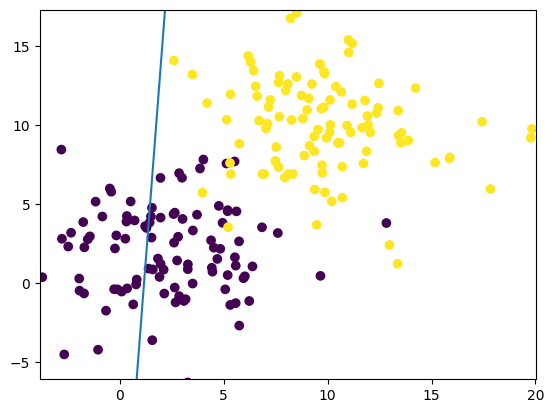

In [12]:
show(w,w0,x,y)

In [13]:
(w,w0)

(array([-1.73610511,  0.10144404]), 2.030906992294968)

In [14]:
np.linalg.norm(w,ord = 1)

1.8375491513407884

In [15]:
#preferred
np.linalg.norm(w)

1.7390663701960971

In [16]:
# not preferred
np.sqrt((w[0]**2)+(w[1]**2))

1.7390663701960971

# Implementing Perceptron Algorithm

In [17]:
def dist_point_hyperplane(w,w0,x):
    d= (np.dot(w,x)+w0)/np.linalg.norm(w)
    return d

In [18]:
def perceptron_training(x,y,w,w0,num_iter=100):
    for i in range(num_iter):
        print(f"Iteration No. : {i+1}")
        miss_classified_points = 0
        for (xi,yi) in zip(x,y):
            d= dist_point_hyperplane(w,w0,xi)
            hs=np.sign(d)
            if hs != np.sign(yi):
                miss_classified_points += 1
                w = w + ( xi * yi)
                w0 = w0 +np.sign(yi)
        print(f"Current Accuracy : {100 - (100*miss_classified_points/len(y))}")
        print(f"Weights : {w[0],w[1],w0}")
        show(w,w0,x,y)
        if miss_classified_points == 0:
            return w, w0
    return w,w0


Iteration No. : 1
Current Accuracy : 67.0
Weights : (2.943838332947772, 14.952587787440905, -27.969093007705034)


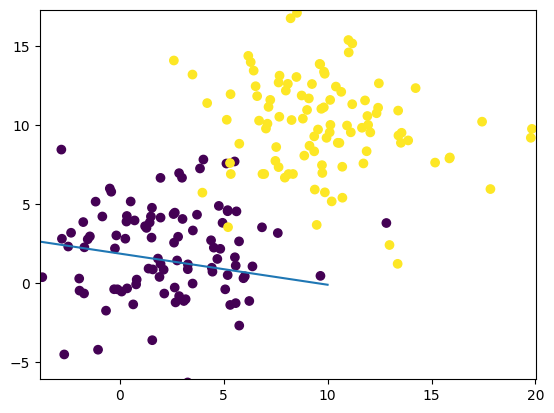

Iteration No. : 2
Current Accuracy : 82.5
Weights : (4.742268601468038, 13.900341655755156, -42.969093007705034)


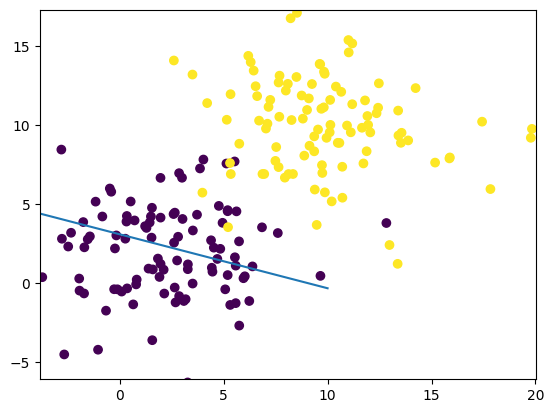

Iteration No. : 3
Current Accuracy : 85.5
Weights : (7.521799130218971, 12.20496956367635, -51.969093007705034)


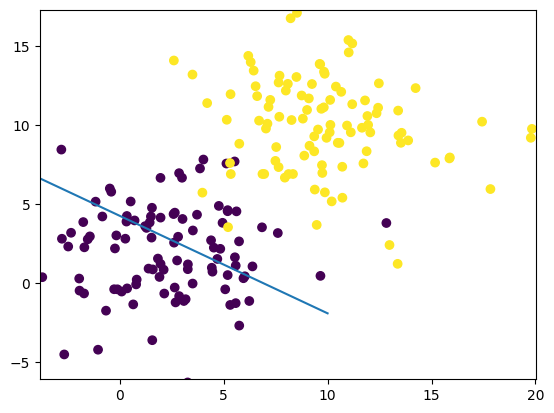

Iteration No. : 4
Current Accuracy : 90.0
Weights : (4.372716166951342, 17.438839362012782, -57.969093007705034)


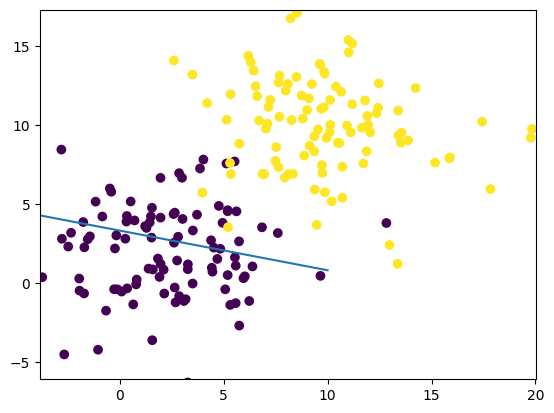

Iteration No. : 5
Current Accuracy : 86.5
Weights : (4.774706957626151, 18.900798689880375, -66.96909300770503)


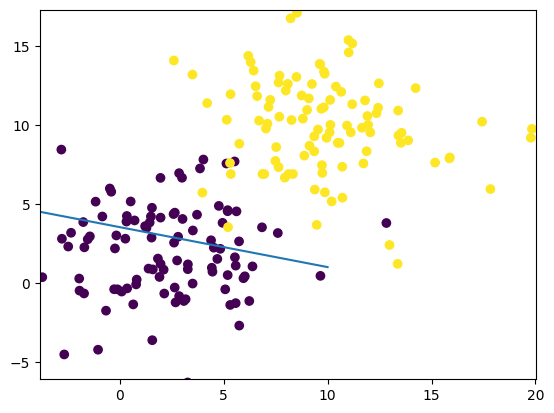

Iteration No. : 6
Current Accuracy : 87.5
Weights : (4.665685712452209, 19.850736737235135, -73.96909300770503)


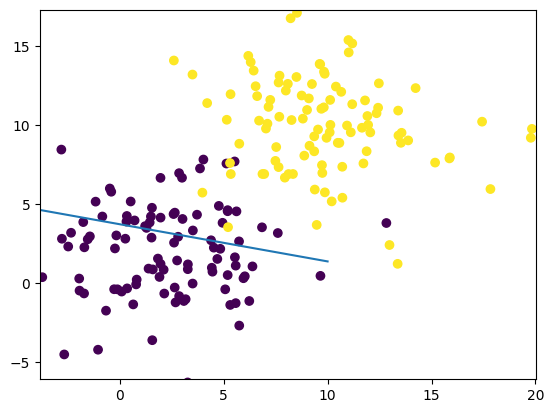

Iteration No. : 7
Current Accuracy : 88.0
Weights : (2.6091210069118986, 17.94575730434764, -79.96909300770503)


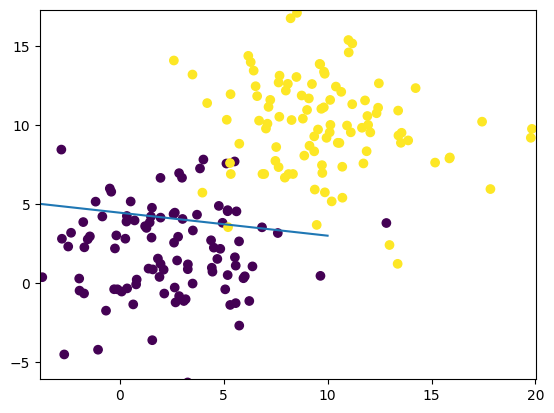

Iteration No. : 8
Current Accuracy : 89.0
Weights : (3.110071059779573, 16.643770092009177, -85.96909300770503)


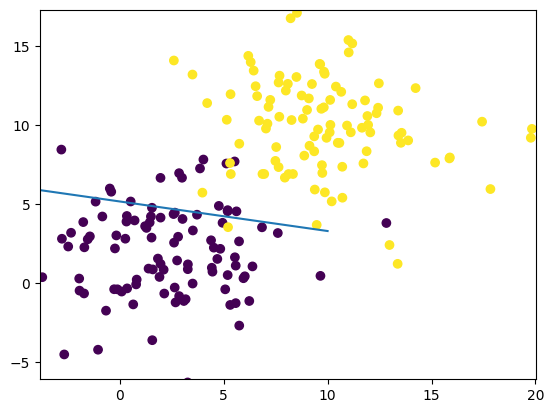

Iteration No. : 9
Current Accuracy : 92.0
Weights : (4.966062885194612, 15.90395113967239, -89.96909300770503)


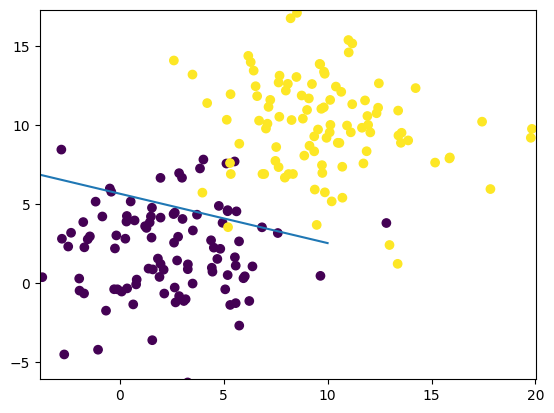

Iteration No. : 10
Current Accuracy : 93.5
Weights : (4.022650108743681, 15.945919420283253, -92.96909300770503)


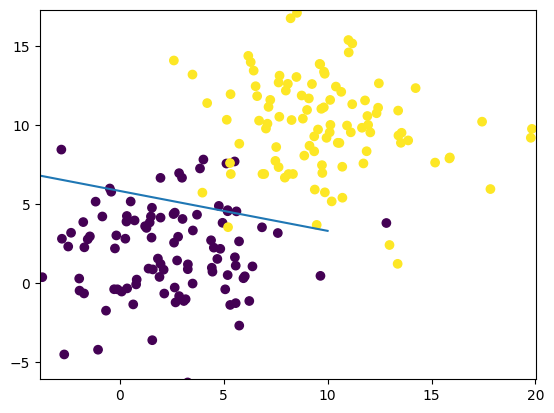

Iteration No. : 11
Current Accuracy : 92.5
Weights : (3.302261888062546, 20.15691278791569, -95.96909300770503)


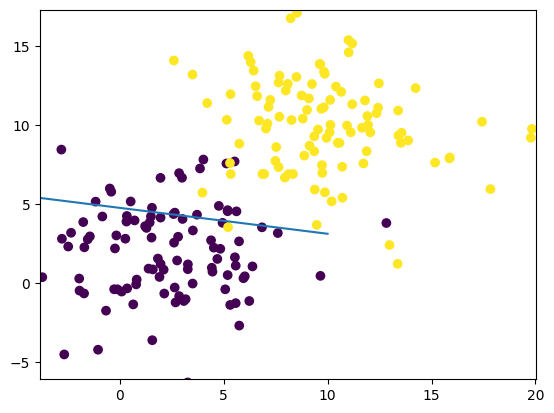

Iteration No. : 12
Current Accuracy : 91.5
Weights : (9.343445687040415, 18.372129769629275, -98.96909300770503)


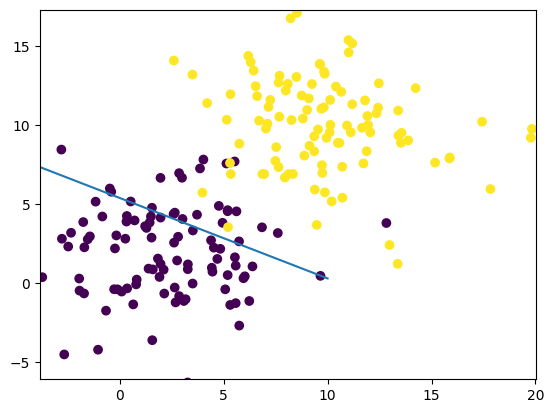

Iteration No. : 13
Current Accuracy : 93.0
Weights : (8.25271390453518, 17.019905723651476, -100.96909300770503)


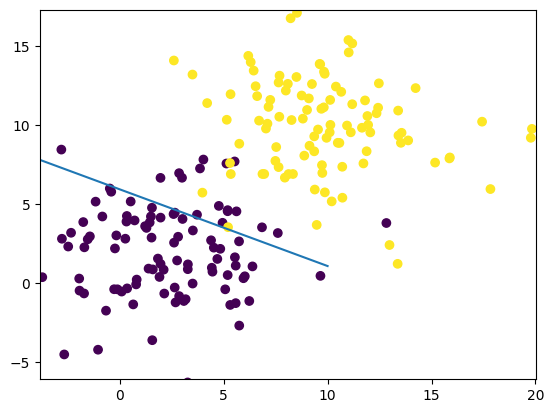

Iteration No. : 14
Current Accuracy : 93.5
Weights : (9.567922268556647, 17.735062802217996, -101.96909300770503)


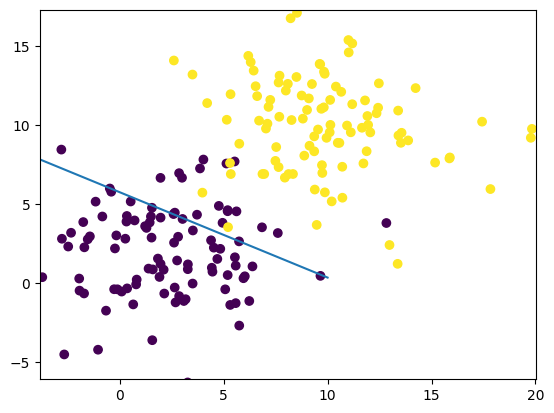

Iteration No. : 15
Current Accuracy : 94.0
Weights : (6.011748839720038, 16.051391018842327, -103.96909300770503)


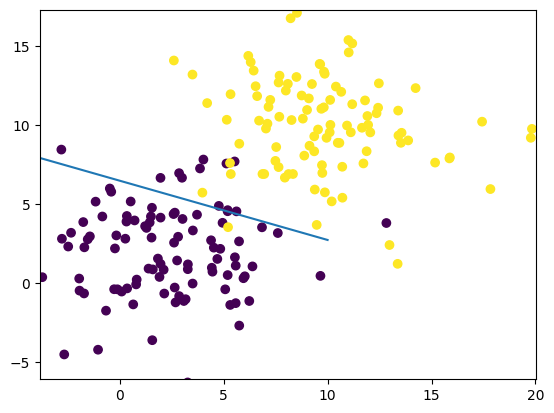

Iteration No. : 16
Current Accuracy : 94.0
Weights : (4.320374672620009, 17.496403762975195, -105.96909300770503)


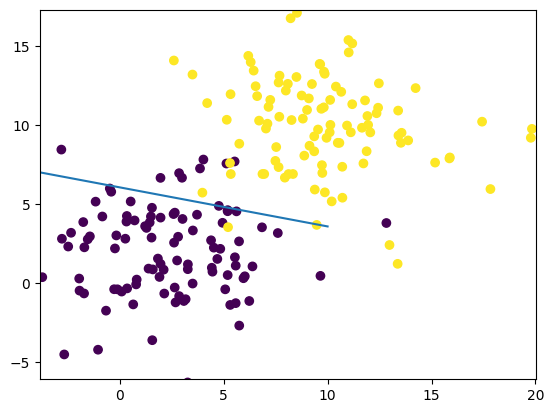

Iteration No. : 17
Current Accuracy : 94.0
Weights : (7.516972834323607, 14.5193612632834, -107.96909300770503)


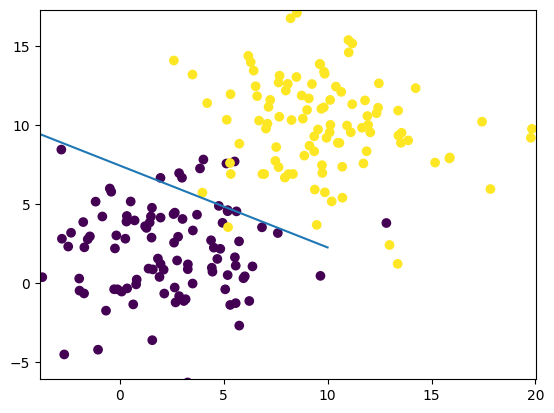

Iteration No. : 18
Current Accuracy : 94.0
Weights : (5.825598667223577, 15.964374007416271, -109.96909300770503)


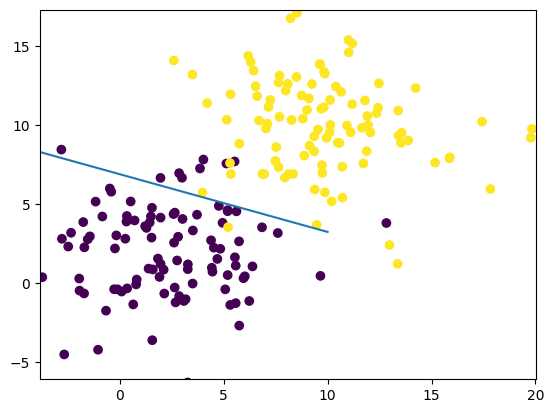

Iteration No. : 19
Current Accuracy : 92.0
Weights : (10.707951500192998, 19.334009860824146, -111.96909300770503)


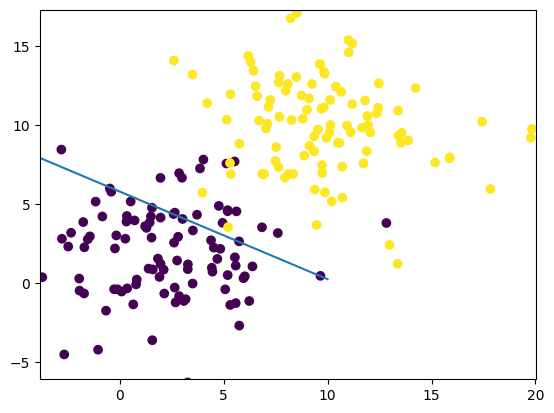

Iteration No. : 20
Current Accuracy : 93.0
Weights : (9.617219717687759, 17.981785814846347, -113.96909300770503)


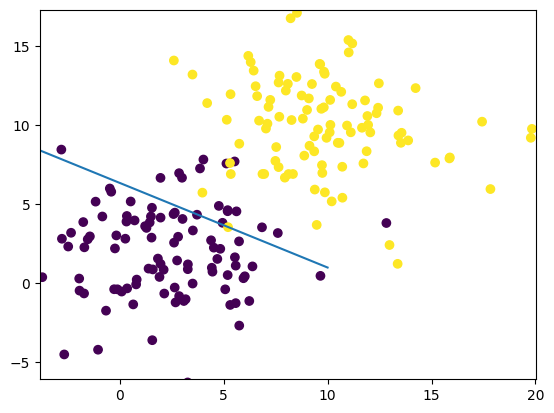

Iteration No. : 21
Current Accuracy : 95.5
Weights : (6.629040463999964, 15.984083320806146, -114.96909300770503)


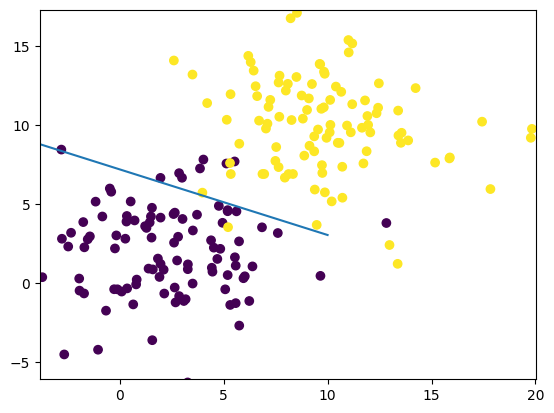

Iteration No. : 22
Current Accuracy : 94.0
Weights : (4.937666296899934, 17.429096064939014, -116.96909300770503)


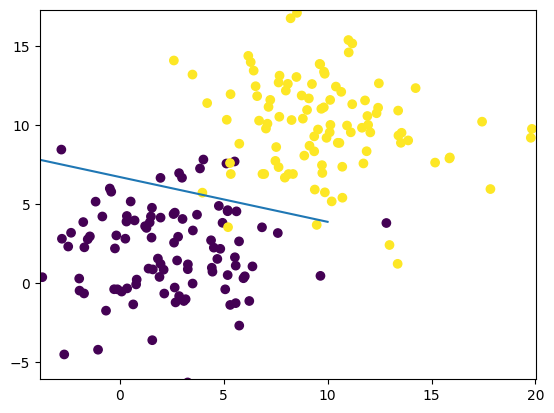

Iteration No. : 23
Current Accuracy : 93.5
Weights : (13.005646251461608, 16.850882427189408, -117.96909300770503)


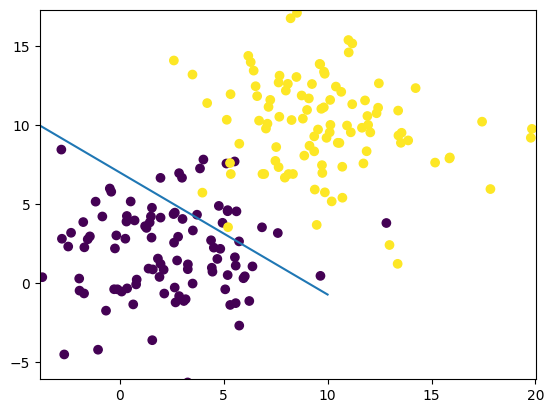

Iteration No. : 24
Current Accuracy : 93.5
Weights : (10.652512189241348, 19.015476163621177, -118.96909300770503)


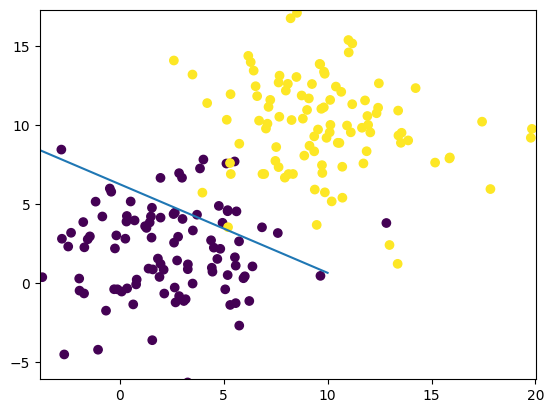

Iteration No. : 25
Current Accuracy : 95.5
Weights : (7.664332935553553, 17.017773669580976, -119.96909300770503)


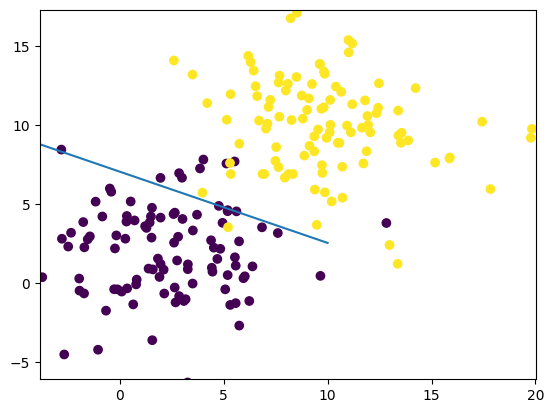

Iteration No. : 26
Current Accuracy : 93.5
Weights : (11.21620240462399, 18.233672668493906, -120.96909300770503)


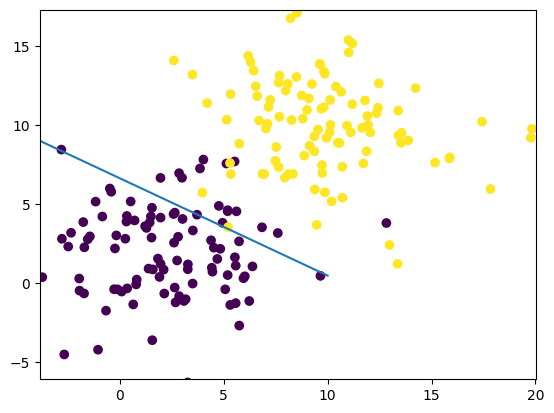

Iteration No. : 27
Current Accuracy : 94.0
Weights : (7.66002897578738, 16.550000885118237, -122.96909300770503)


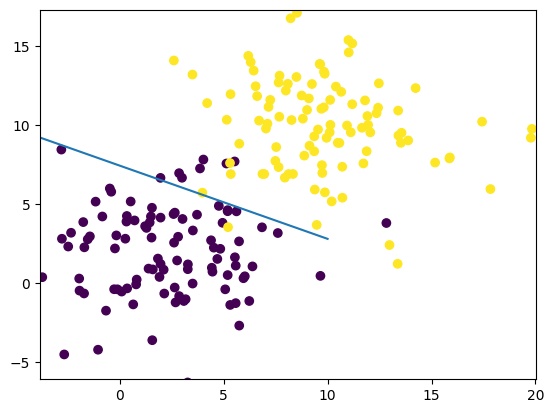

Iteration No. : 28
Current Accuracy : 94.0
Weights : (5.968654808687351, 17.99501362925111, -124.96909300770503)


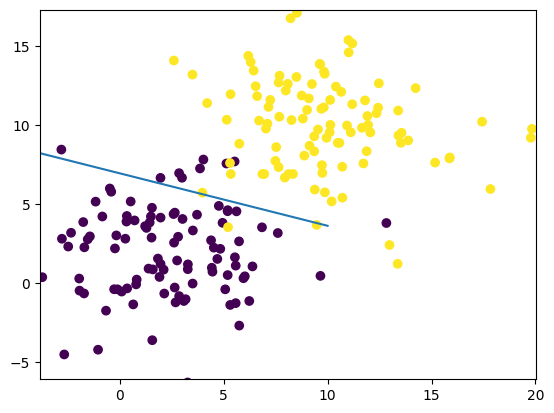

Iteration No. : 29
Current Accuracy : 93.5
Weights : (14.036634763249028, 17.416799991501502, -125.96909300770503)


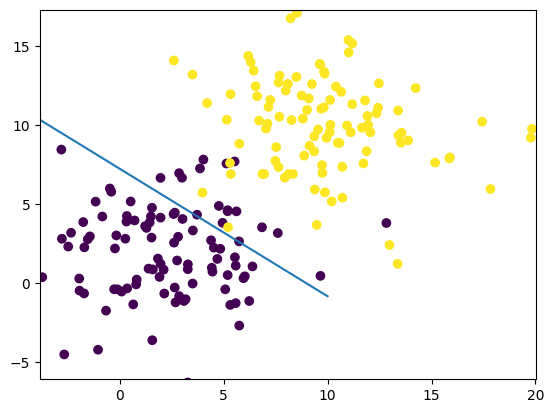

Iteration No. : 30
Current Accuracy : 95.0
Weights : (7.899760787689047, 17.553243400257184, -127.96909300770503)


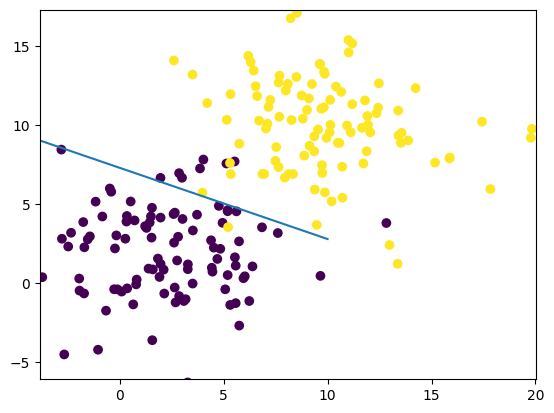

Iteration No. : 31
Current Accuracy : 93.0
Weights : (8.340928850054453, 18.722397505162537, -129.96909300770503)


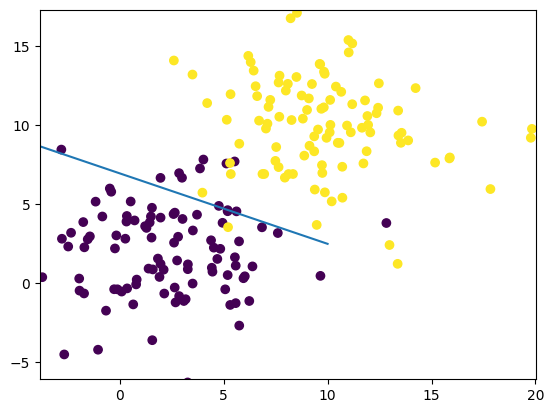

Iteration No. : 32
Current Accuracy : 95.0
Weights : (13.892473815466461, 17.674087215199275, -129.96909300770503)


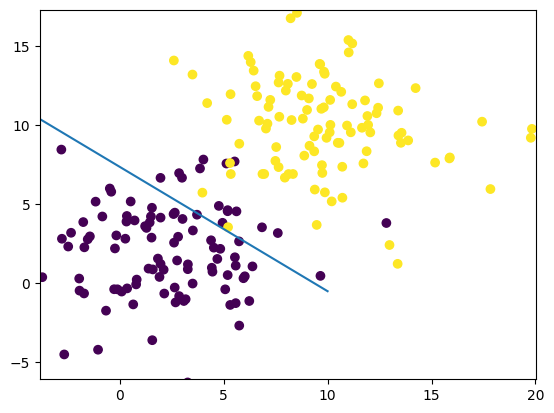

Iteration No. : 33
Current Accuracy : 93.5
Weights : (10.691571693996691, 20.183356930428324, -130.96909300770503)


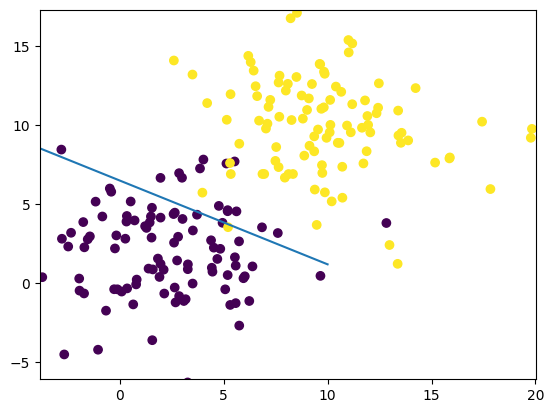

Iteration No. : 34
Current Accuracy : 95.5
Weights : (7.703392440308896, 18.185654436388123, -131.96909300770503)


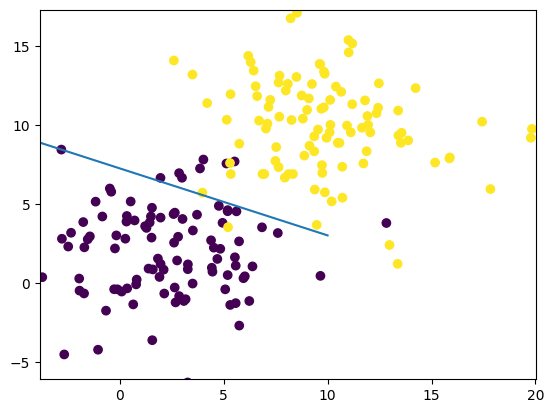

Iteration No. : 35
Current Accuracy : 94.0
Weights : (6.0120182732088665, 19.63066718052099, -133.96909300770503)


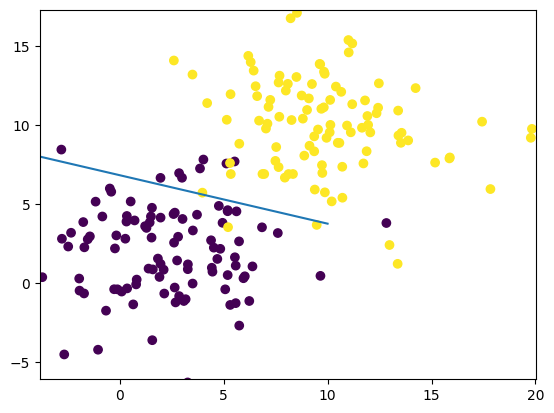

Iteration No. : 36
Current Accuracy : 93.5
Weights : (14.07999822777054, 19.052453542771385, -134.96909300770503)


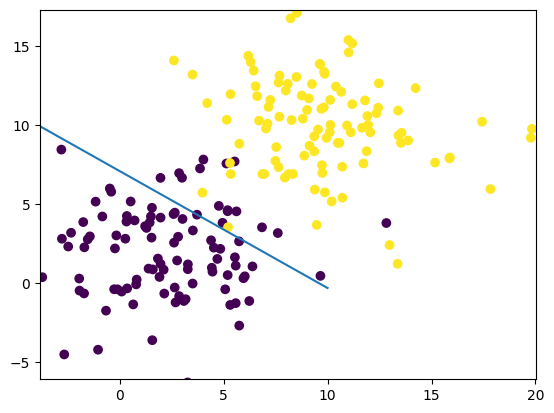

Iteration No. : 37
Current Accuracy : 94.5
Weights : (13.539178702267344, 19.527729865427382, -135.96909300770503)


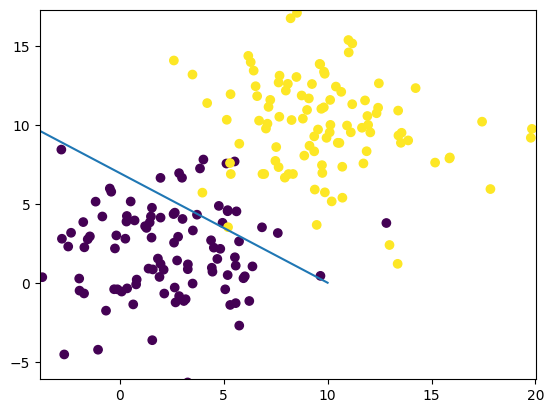

Iteration No. : 38
Current Accuracy : 94.0
Weights : (5.4668947879394985, 19.638170718714242, -137.96909300770503)


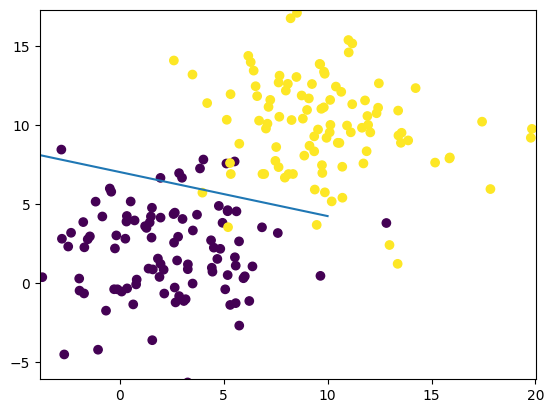

Iteration No. : 39
Current Accuracy : 94.5
Weights : (8.04422046922868, 17.891242063635953, -138.96909300770503)


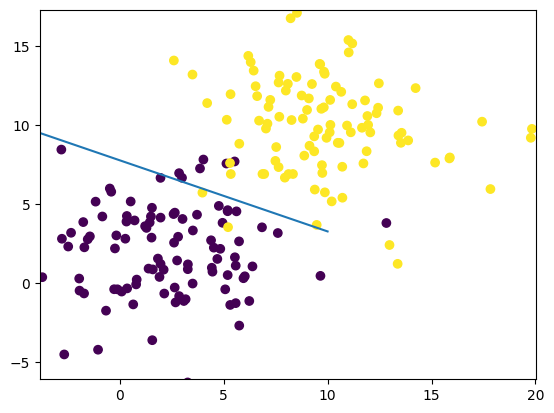

Iteration No. : 40
Current Accuracy : 94.5
Weights : (10.966264216583644, 16.140468191006253, -139.96909300770503)


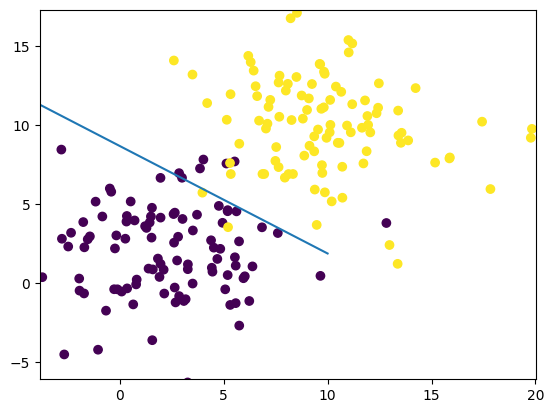

Iteration No. : 41
Current Accuracy : 94.0
Weights : (13.168962591572809, 19.95509336598708, -139.96909300770503)


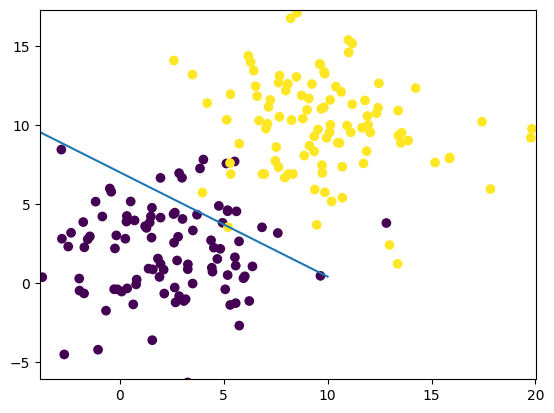

Iteration No. : 42
Current Accuracy : 94.5
Weights : (6.705342081624204, 23.638444431767766, -140.96909300770503)


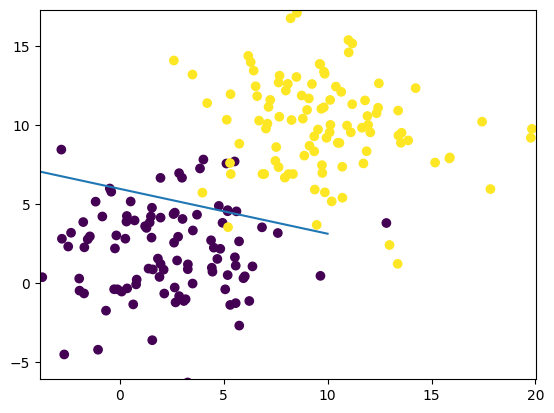

Iteration No. : 43
Current Accuracy : 95.5
Weights : (7.385505254178138, 20.19130527986232, -141.96909300770503)


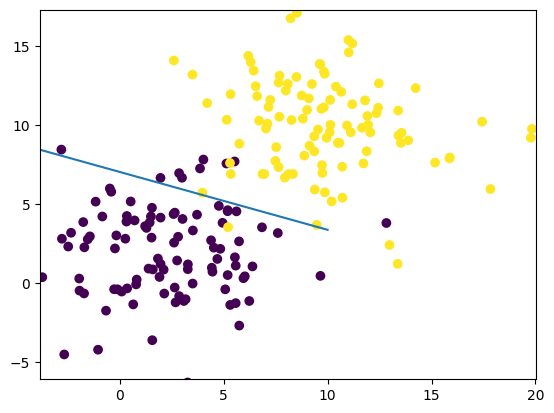

Iteration No. : 44
Current Accuracy : 94.5
Weights : (7.327321738061922, 20.474592735915206, -142.96909300770503)


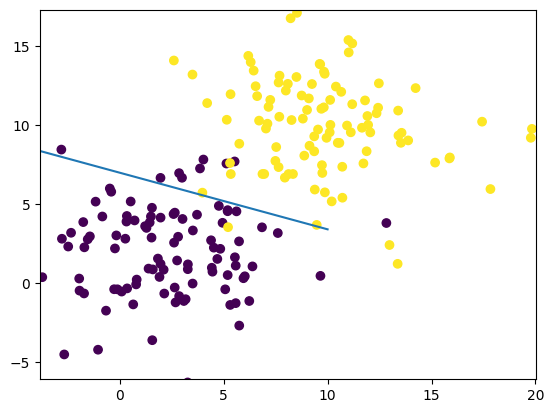

Iteration No. : 45
Current Accuracy : 94.5
Weights : (7.269138221945706, 20.75788019196809, -143.96909300770503)


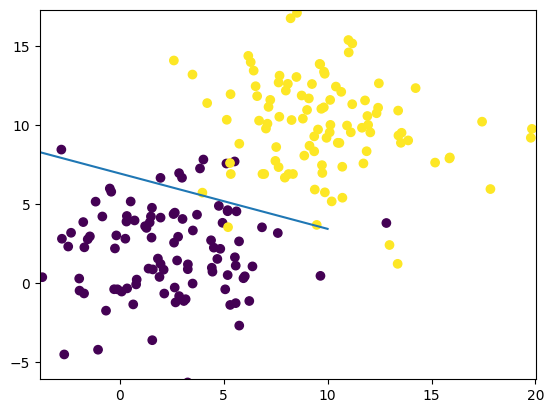

Iteration No. : 46
Current Accuracy : 94.5
Weights : (7.21095470582949, 21.041167648020977, -144.96909300770503)


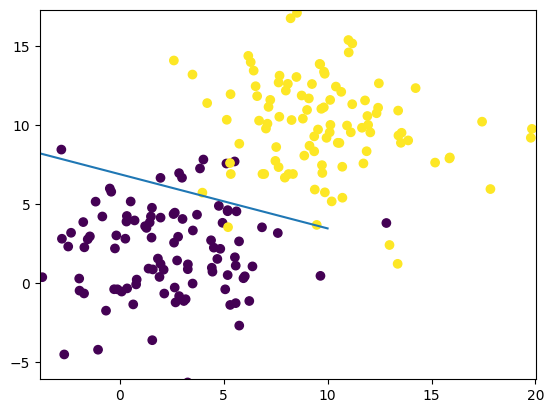

Iteration No. : 47
Current Accuracy : 94.5
Weights : (7.152771189713274, 21.324455104073863, -145.96909300770503)


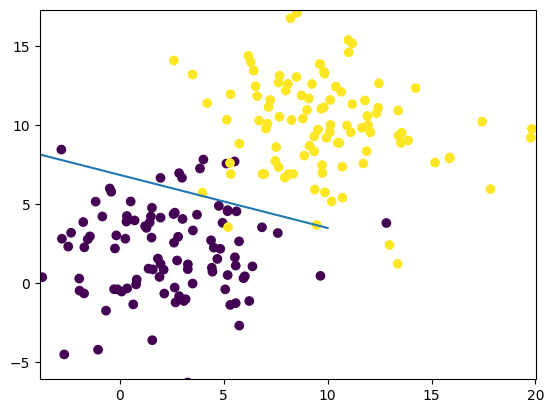

Iteration No. : 48
Current Accuracy : 95.0
Weights : (12.704316155125282, 20.276144814110605, -145.96909300770503)


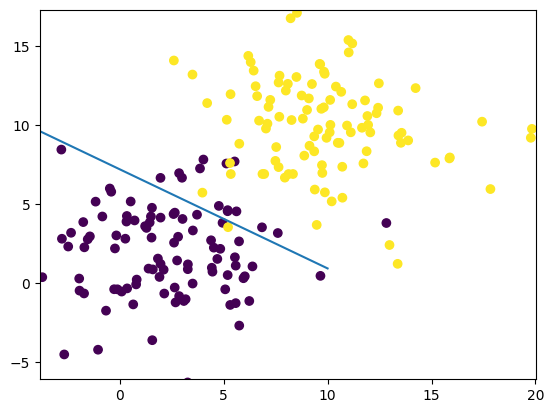

Iteration No. : 49
Current Accuracy : 95.5
Weights : (9.716136901437487, 18.278442320070404, -146.96909300770503)


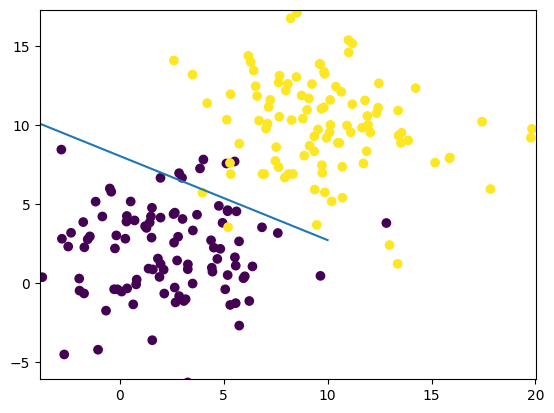

Iteration No. : 50
Current Accuracy : 94.0
Weights : (11.91883527642665, 22.093067495051226, -146.96909300770503)


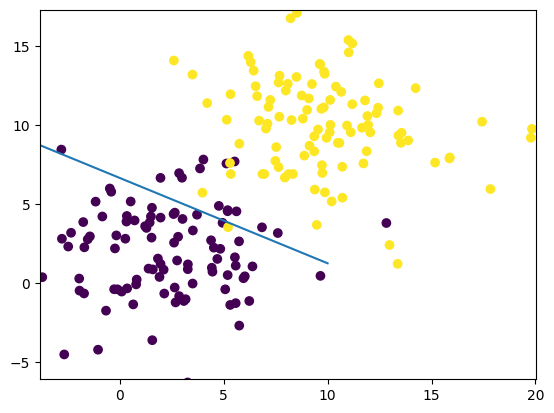

Iteration No. : 51
Current Accuracy : 96.0
Weights : (14.540384504267076, 18.763767254994878, -146.96909300770503)


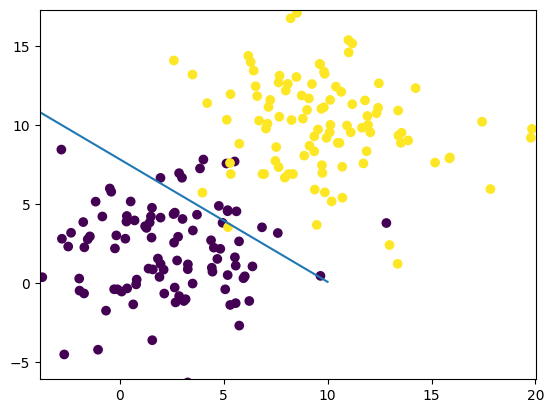

Iteration No. : 52
Current Accuracy : 95.5
Weights : (11.55220525057928, 16.766064760954677, -147.96909300770503)


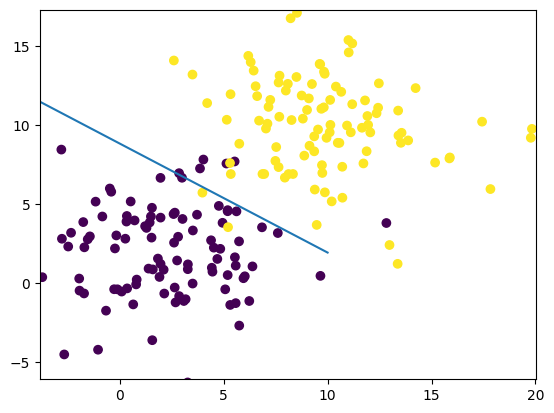

Iteration No. : 53
Current Accuracy : 94.0
Weights : (13.754903625568447, 20.5806899359355, -147.96909300770503)


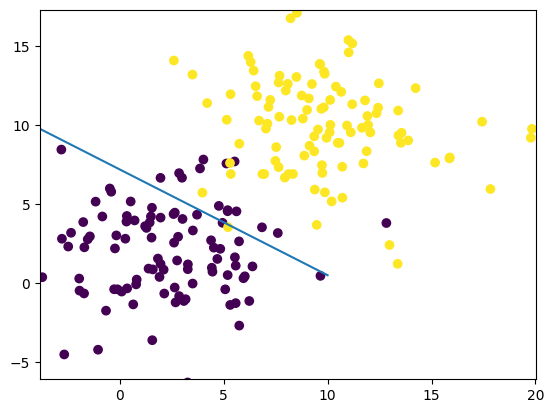

Iteration No. : 54
Current Accuracy : 95.5
Weights : (8.867284136813657, 22.703918394258586, -148.96909300770503)


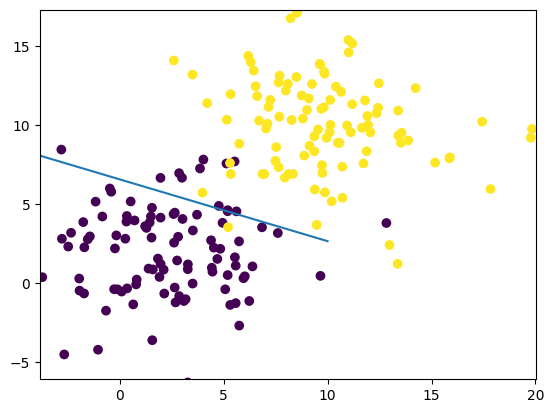

Iteration No. : 55
Current Accuracy : 95.5
Weights : (6.924590329513634, 21.042559306526908, -149.96909300770503)


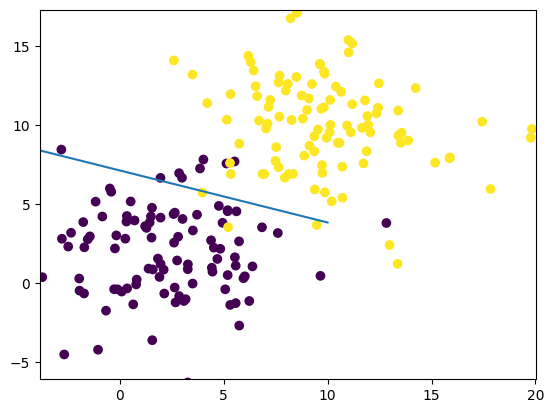

Iteration No. : 56
Current Accuracy : 94.5
Weights : (9.846634076868602, 19.291785433897203, -150.96909300770503)


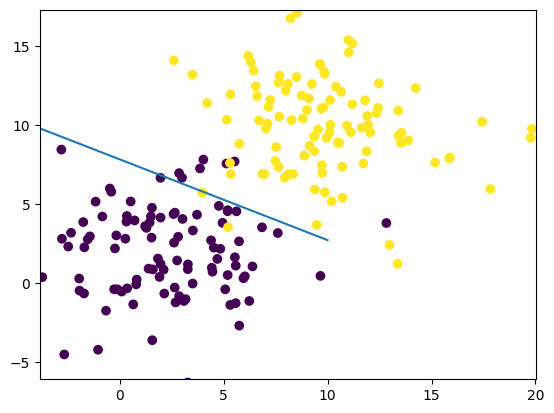

Iteration No. : 57
Current Accuracy : 94.5
Weights : (7.177950658999691, 20.707581746935837, -151.96909300770503)


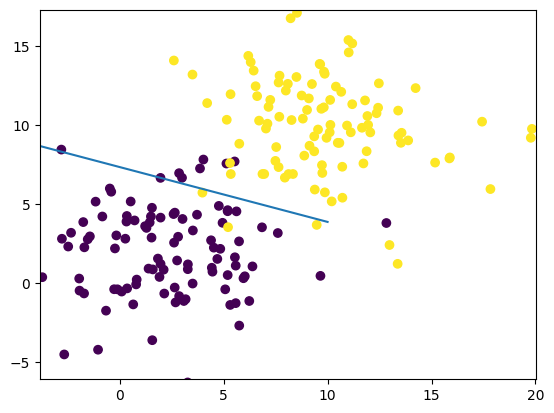

Iteration No. : 58
Current Accuracy : 94.5
Weights : (10.099994406354659, 18.956807874306136, -152.96909300770503)


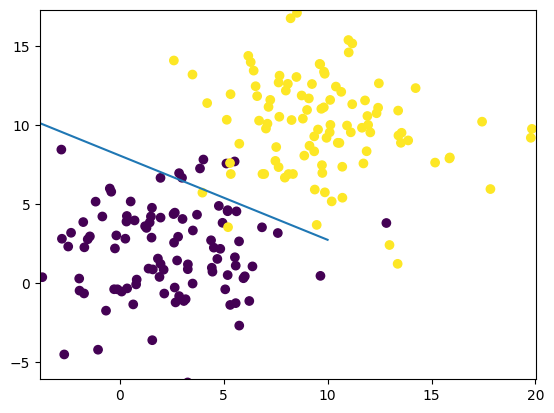

Iteration No. : 59
Current Accuracy : 94.5
Weights : (7.431310988485748, 20.37260418734477, -153.96909300770503)


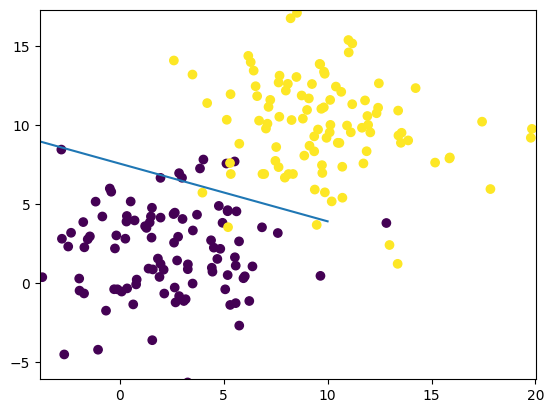

Iteration No. : 60
Current Accuracy : 94.5
Weights : (10.353354735840716, 18.62183031471507, -154.96909300770503)


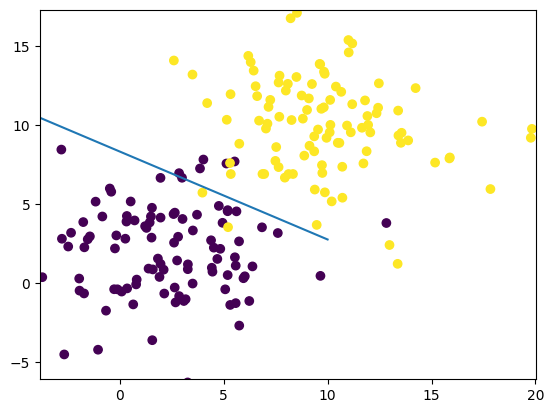

Iteration No. : 61
Current Accuracy : 94.0
Weights : (12.55605311082988, 22.43645548969589, -154.96909300770503)


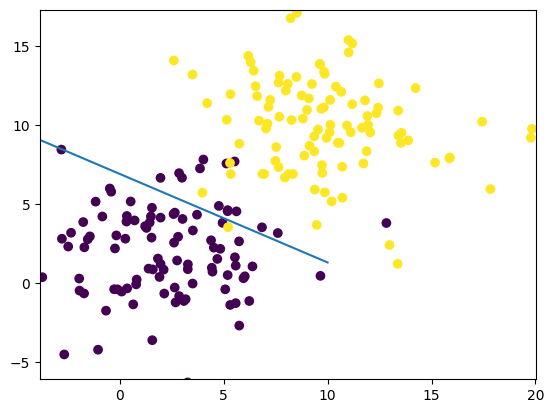

Iteration No. : 62
Current Accuracy : 96.0
Weights : (15.177602338670306, 19.107155249639543, -154.96909300770503)


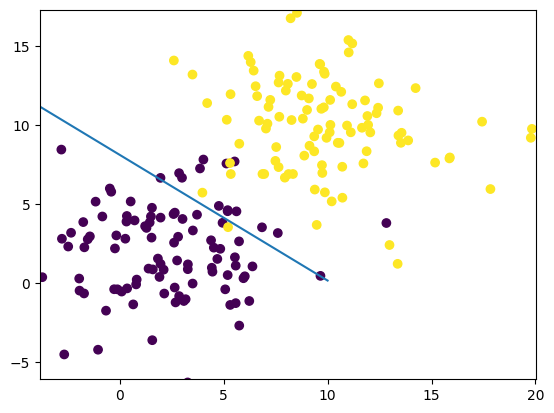

Iteration No. : 63
Current Accuracy : 95.0
Weights : (16.21303681859108, 19.852957596338815, -154.96909300770503)


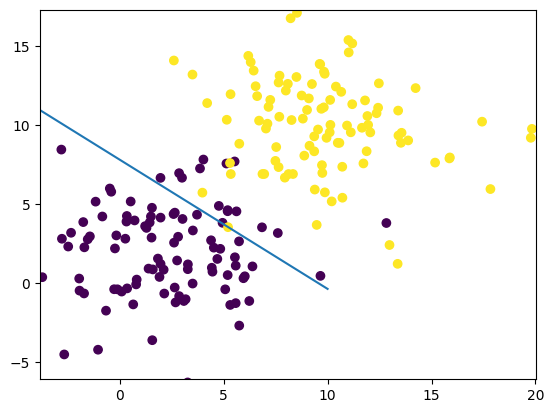

Iteration No. : 64
Current Accuracy : 95.0
Weights : (10.076162843031092, 19.989401005094496, -156.96909300770503)


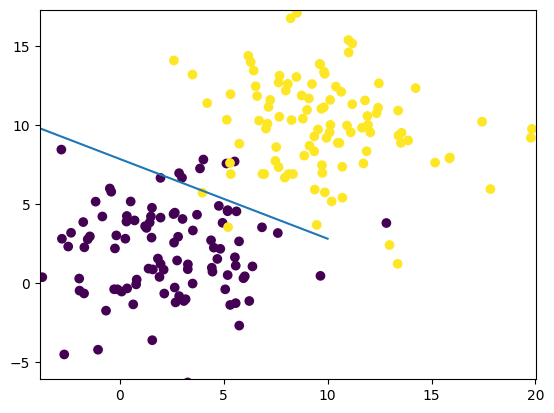

Iteration No. : 65
Current Accuracy : 93.5
Weights : (13.172115402642323, 19.4578361272115, -157.96909300770503)


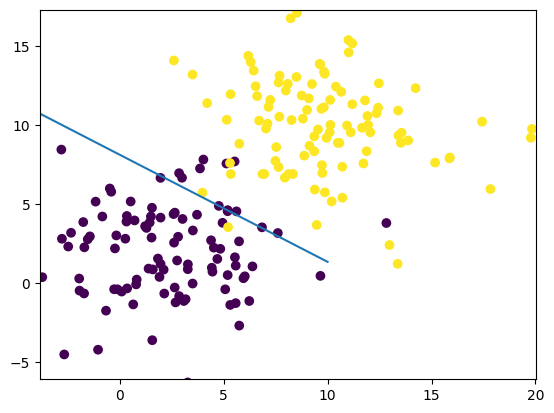

Iteration No. : 66
Current Accuracy : 95.0
Weights : (16.100803388200376, 20.195305901422014, -157.96909300770503)


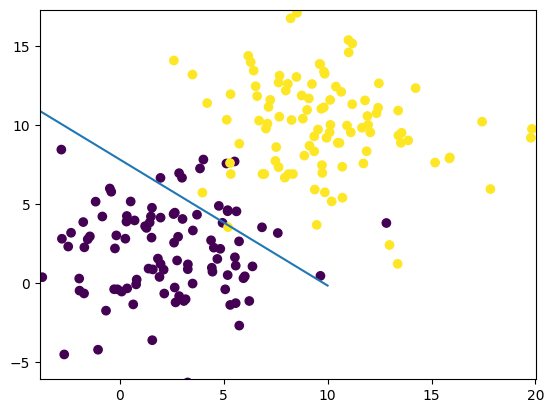

Iteration No. : 67
Current Accuracy : 95.0
Weights : (9.116161353390883, 20.67642528897498, -159.96909300770503)


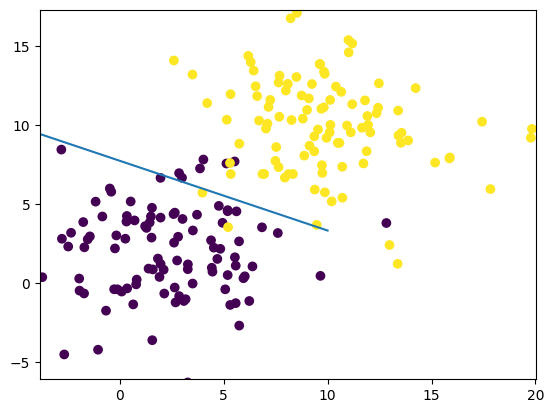

Iteration No. : 68
Current Accuracy : 94.5
Weights : (7.811689656012877, 21.47631733802094, -160.96909300770503)


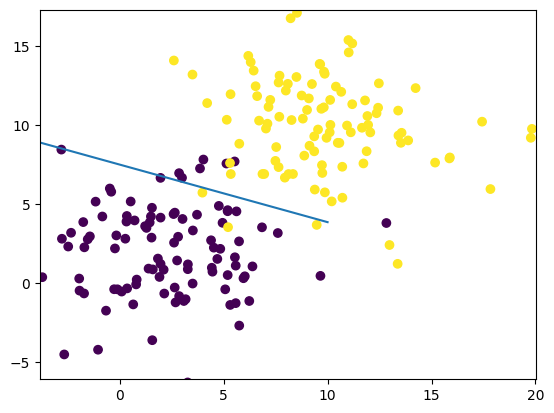

Iteration No. : 69
Current Accuracy : 94.5
Weights : (10.733733403367841, 19.72554346539124, -161.96909300770503)


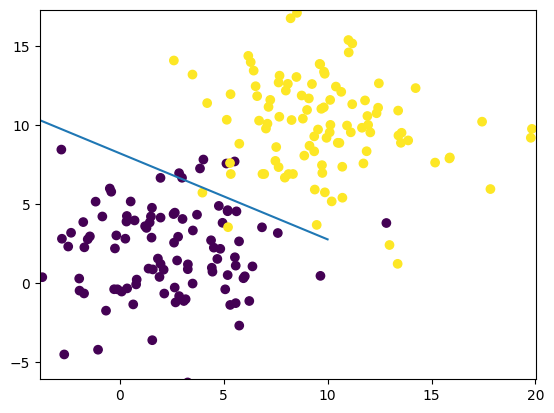

Iteration No. : 70
Current Accuracy : 94.5
Weights : (8.06504998549893, 21.141339778429874, -162.96909300770503)


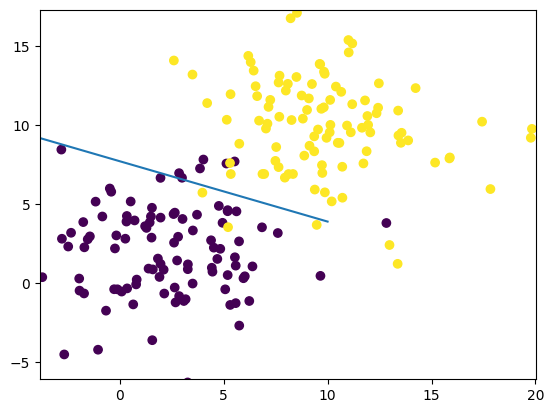

Iteration No. : 71
Current Accuracy : 94.5
Weights : (10.987093732853898, 19.390565905800173, -163.96909300770503)


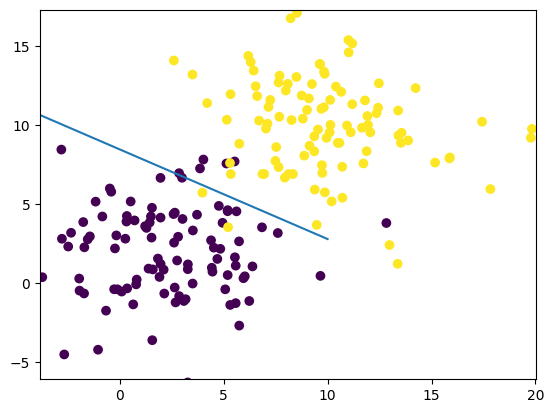

Iteration No. : 72
Current Accuracy : 94.0
Weights : (13.189792107843063, 23.205191080780995, -163.96909300770503)


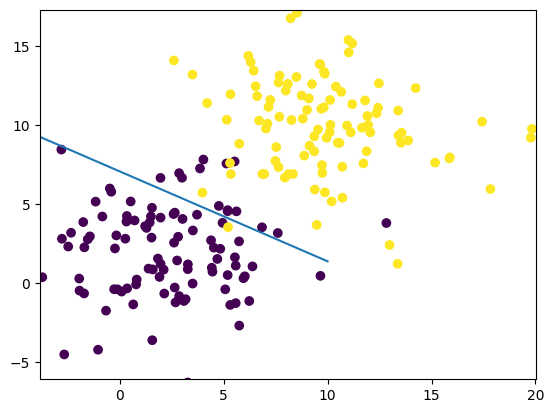

Iteration No. : 73
Current Accuracy : 95.5
Weights : (9.353844794905758, 21.552164565538078, -164.96909300770503)


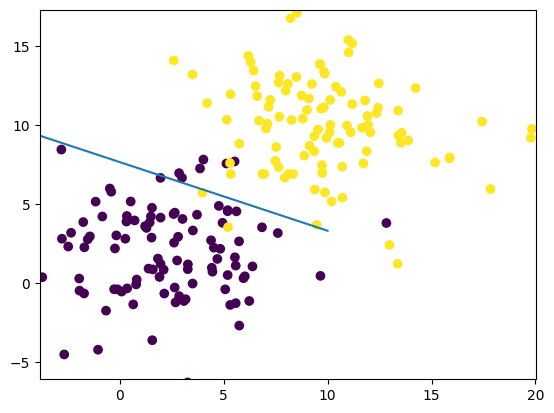

Iteration No. : 74
Current Accuracy : 94.5
Weights : (8.049373097527752, 22.352056614584047, -165.96909300770503)


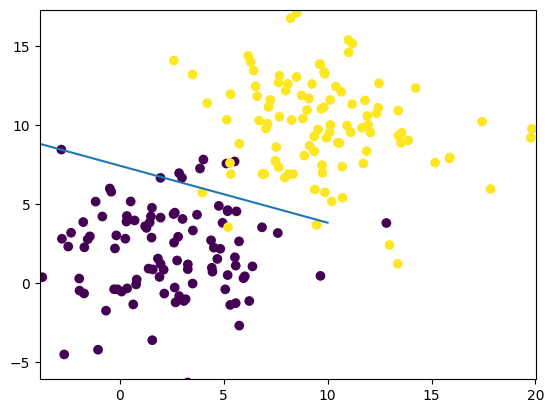

Iteration No. : 75
Current Accuracy : 93.5
Weights : (12.509537377629893, 21.204587472708386, -166.96909300770503)


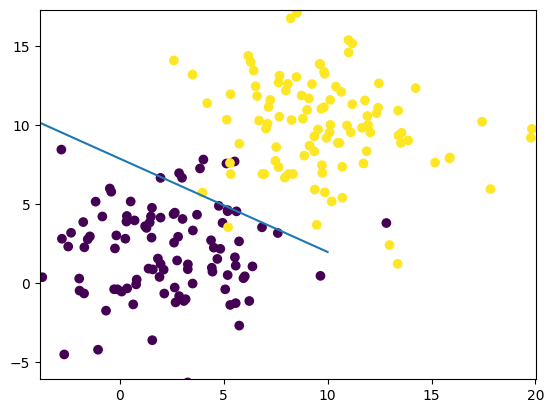

Iteration No. : 76
Current Accuracy : 95.0
Weights : (15.438225363187948, 21.942057246918896, -166.96909300770503)


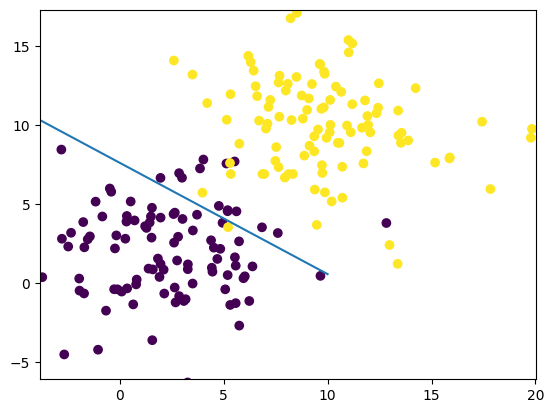

Iteration No. : 77
Current Accuracy : 95.5
Weights : (8.948548060417869, 26.757981148017567, -167.96909300770503)


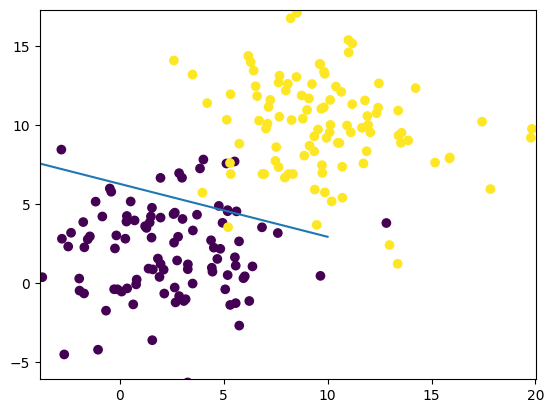

Iteration No. : 78
Current Accuracy : 95.5
Weights : (7.872235518392852, 22.69028104958685, -168.96909300770503)


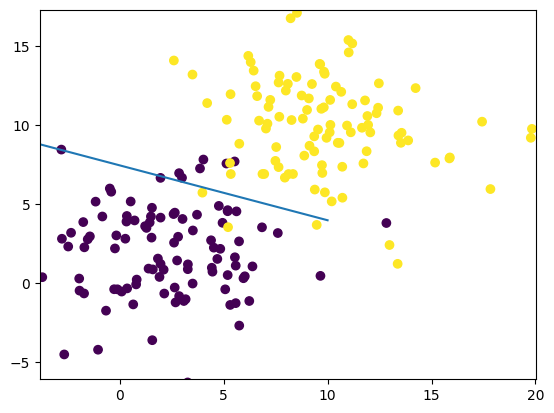

Iteration No. : 79
Current Accuracy : 93.5
Weights : (12.332399798494993, 21.542811907711194, -169.96909300770503)


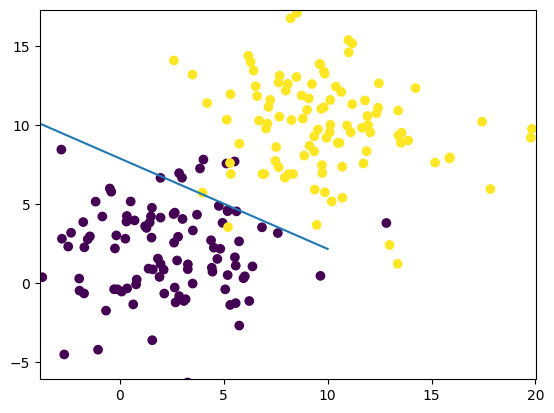

Iteration No. : 80
Current Accuracy : 95.0
Weights : (17.883944763907003, 20.494501617747932, -169.96909300770503)


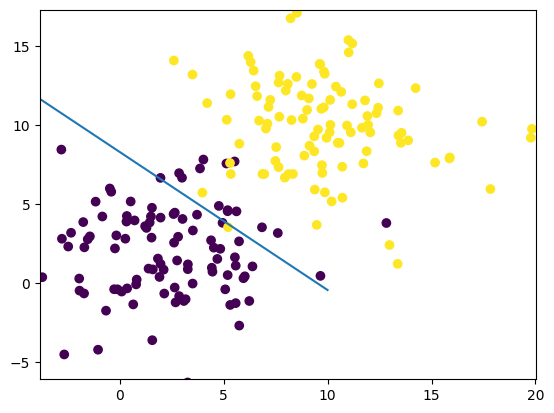

Iteration No. : 81
Current Accuracy : 95.0
Weights : (10.899302729097517, 20.975621005300898, -171.96909300770503)


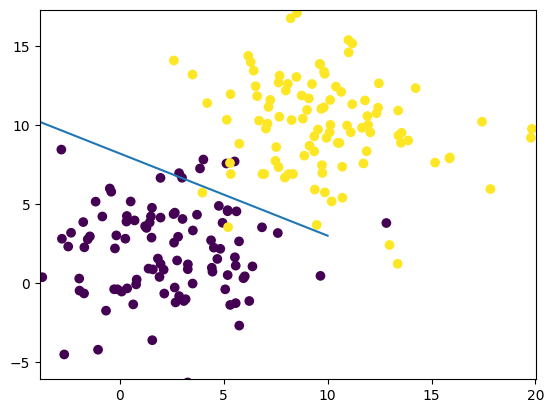

Iteration No. : 82
Current Accuracy : 93.5
Weights : (13.995255288708751, 20.444056127417905, -172.96909300770503)


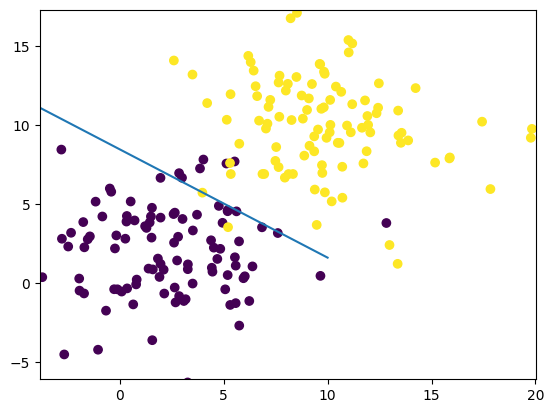

Iteration No. : 83
Current Accuracy : 94.5
Weights : (9.908485253758407, 22.834311311791645, -173.96909300770503)


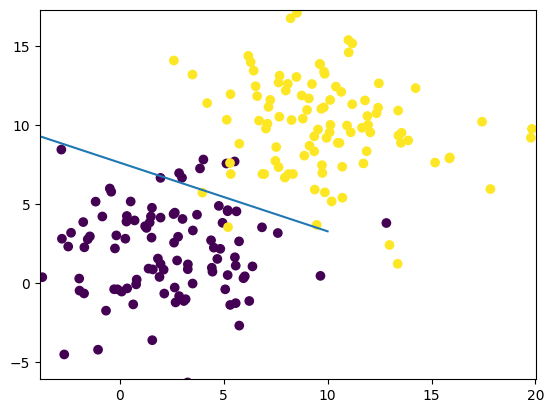

Iteration No. : 84
Current Accuracy : 93.5
Weights : (8.686521144699267, 23.87307857456298, -174.96909300770503)


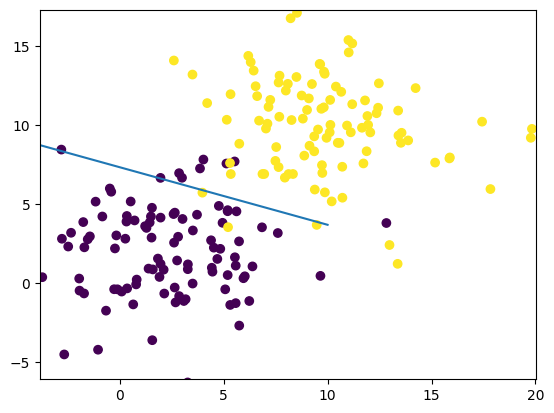

Iteration No. : 85
Current Accuracy : 93.5
Weights : (10.224191806552408, 22.497172254146527, -175.96909300770503)


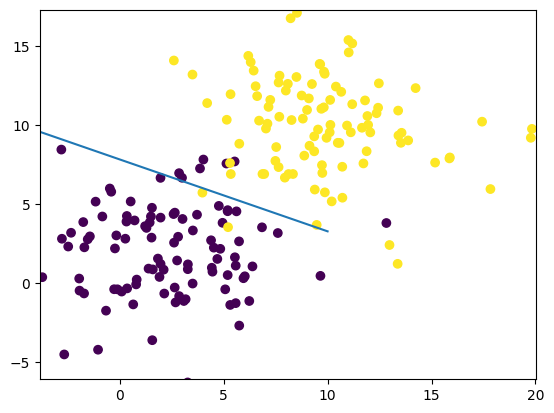

Iteration No. : 86
Current Accuracy : 93.5
Weights : (9.002227697493264, 23.535939516917864, -176.96909300770503)


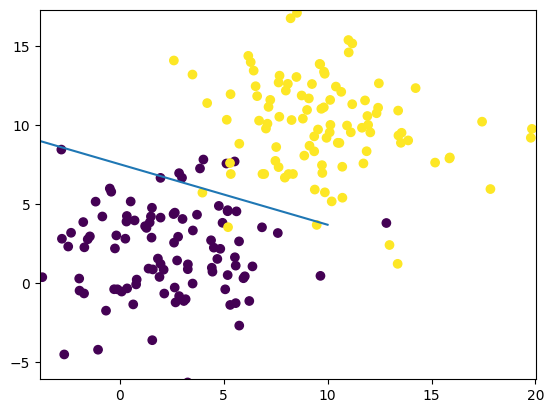

Iteration No. : 87
Current Accuracy : 93.5
Weights : (7.780263588434121, 24.5747067796892, -177.96909300770503)


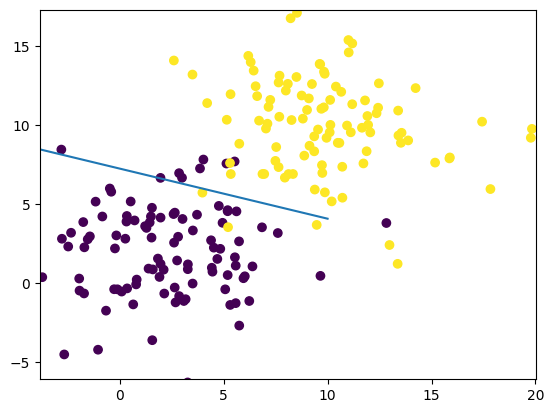

Iteration No. : 88
Current Accuracy : 93.5
Weights : (7.493168332529205, 25.336521258766357, -178.96909300770503)


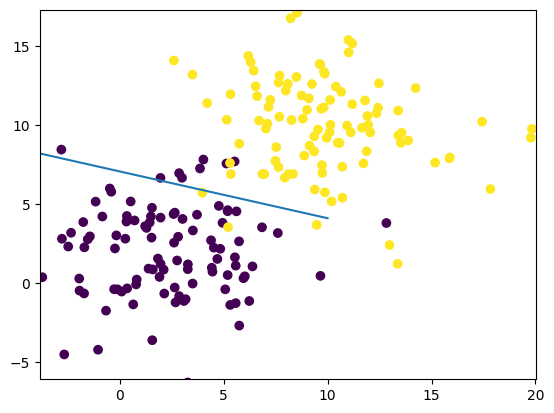

Iteration No. : 89
Current Accuracy : 94.5
Weights : (12.33560936276806, 20.953317424037174, -179.96909300770503)


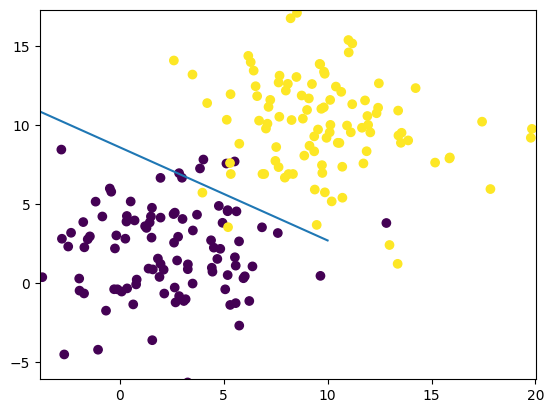

Iteration No. : 90
Current Accuracy : 94.5
Weights : (9.666925944899146, 22.36911373707581, -180.96909300770503)


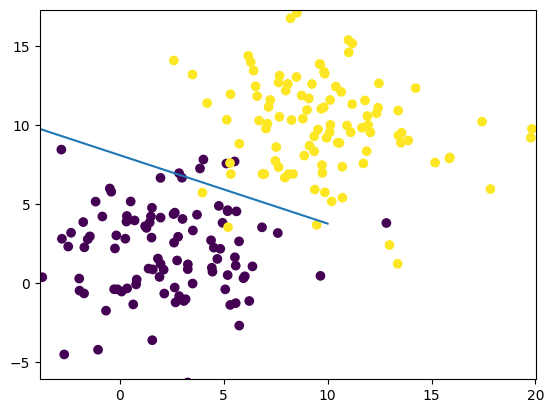

Iteration No. : 91
Current Accuracy : 94.0
Weights : (15.145702752041993, 23.497837043673453, -180.96909300770503)


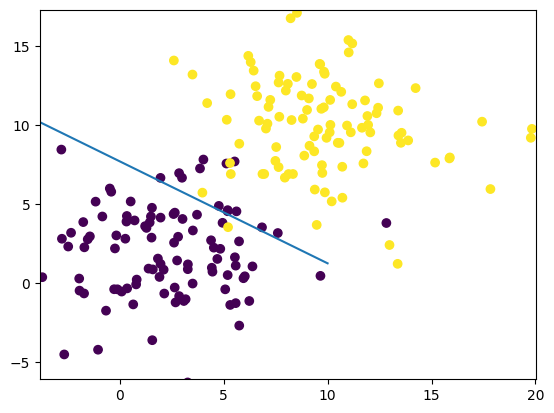

Iteration No. : 92
Current Accuracy : 95.5
Weights : (11.309755439104688, 21.844810528430536, -181.96909300770503)


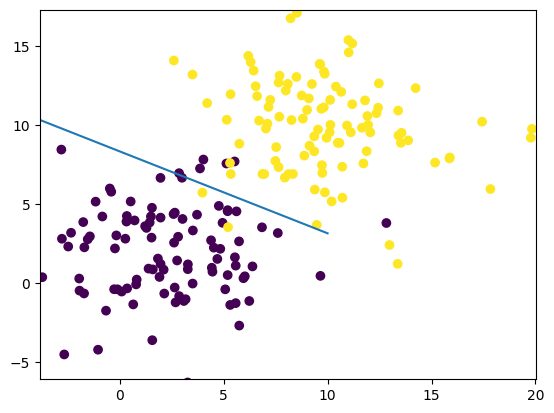

Iteration No. : 93
Current Accuracy : 93.5
Weights : (8.384295727814273, 24.62261730914907, -182.96909300770503)


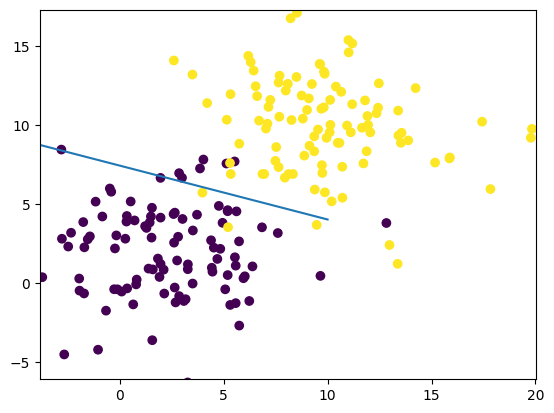

Iteration No. : 94
Current Accuracy : 93.5
Weights : (8.09720047190936, 25.384431788226227, -183.96909300770503)


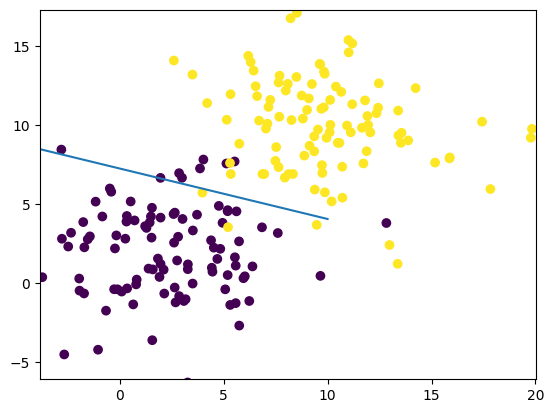

Iteration No. : 95
Current Accuracy : 93.5
Weights : (10.059713089422576, 23.740183325120093, -184.96909300770503)


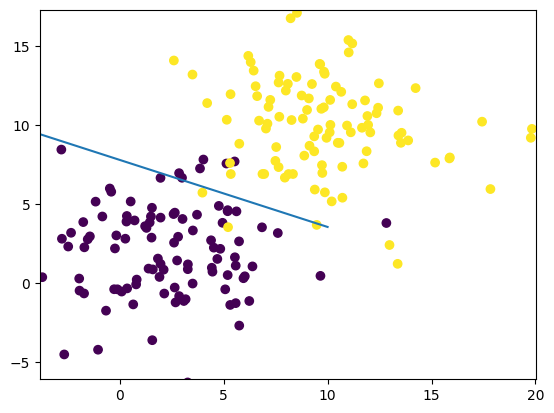

Iteration No. : 96
Current Accuracy : 93.5
Weights : (9.262590936023503, 24.510608445201754, -185.96909300770503)


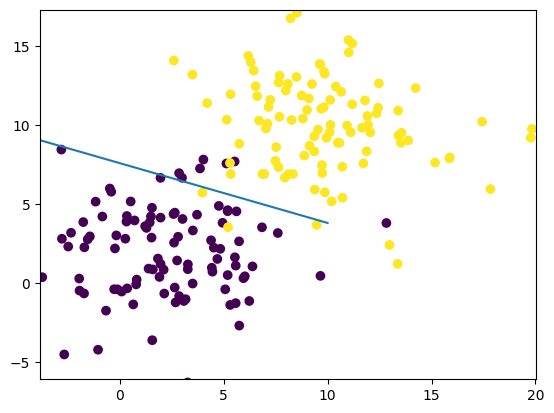

Iteration No. : 97
Current Accuracy : 93.5
Weights : (8.975495680118591, 25.27242292427891, -186.96909300770503)


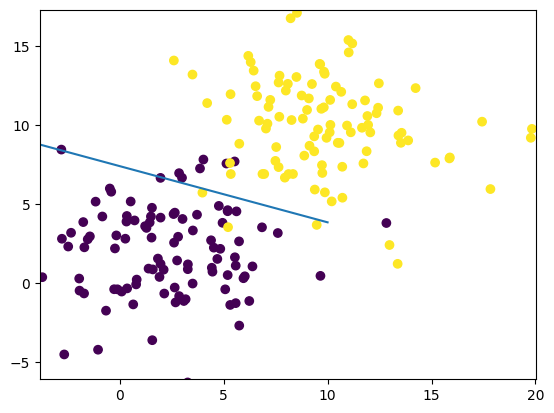

Iteration No. : 98
Current Accuracy : 93.5
Weights : (8.178373526719522, 26.042848044360568, -187.96909300770503)


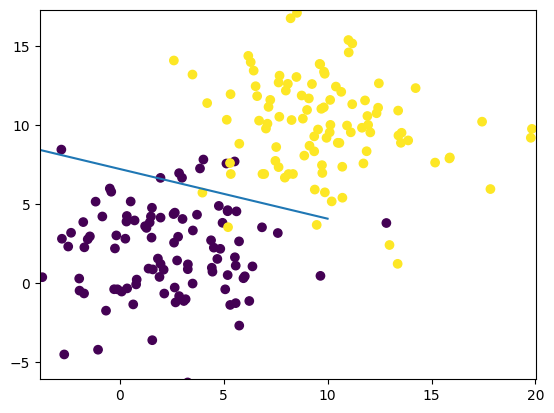

Iteration No. : 99
Current Accuracy : 93.5
Weights : (10.140886144232734, 24.398599581254437, -188.96909300770503)


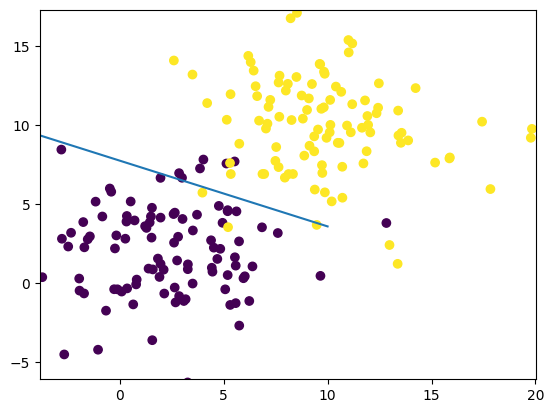

Iteration No. : 100
Current Accuracy : 93.5
Weights : (9.343763990833661, 25.1690247013361, -189.96909300770503)


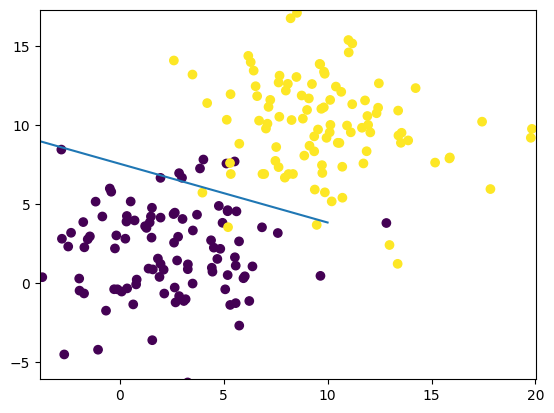

In [19]:
 w,w0 = perceptron_training(x,y,w,w0)